<a href="https://colab.research.google.com/github/Aleamarals/Preveja-os-usuarios-com-alta-chance-de-deixar-seu-Streaming/blob/main/Desafio06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Descritiva

In [ ]:
!pip install ydata_profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 63.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 54.8 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=d591304c5e8c0a78982e268c3376ea95d3b10af6f2f1e96dc88853055f808636
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0


In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import missingno as msno
from ydata_profiling import ProfileReport

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
churn = pd.read_csv('/content/streaming_data.csv')
churn.head()

Age  Gender  Time_on_platform  Devices_connected Subscription_type  \
0  49.0    Male            4700.0                3.0             Basic   
1  69.0  Female            6107.0                2.0          Standard   
2  44.0    Male            6374.0                3.0           Premium   
3  26.0    Male               NaN                5.0             Basic   
4  18.0     NaN            1948.0                3.0             Basic   

   Num_streaming_services  Num_active_profiles  Avg_rating  Churned  \
0                     NaN                    3         NaN      0.0   
1                     NaN                    1        2.14      0.0   
2                     1.0                    1        1.91      1.0   
3                     NaN                    2         NaN      NaN   
4                     NaN                    3        3.88      0.0   

                                User_id  
0  a271aa56-bcfc-4f0a-91f7-b773de6b86a4  
1  fe14b048-770b-4619-8ec6-485b0969ae31  
2  0283dffd-6684-4a05-9c6f-c02098a6849d  
3  c316f2f5-3403-4a0a-82c2-c98e4b3379d2  
4  14879bcb-1977-4ad8-a7f9-6aa9bf7b872f

In [ ]:
churn.describe()

Age  Time_on_platform  Devices_connected  \
count  66607.000000      56464.000000       52696.000000   
mean      43.511072       4385.848505           2.995370   
std       15.043158       2526.580859           1.414072   
min       18.000000          0.000000           1.000000   
25%       30.000000       2196.000000           2.000000   
50%       43.000000       4384.000000           3.000000   
75%       57.000000       6573.000000           4.000000   
max       69.000000       8759.000000           5.000000   

       Num_streaming_services  Num_active_profiles    Avg_rating       Churned  
count             9572.000000         77884.000000  60614.000000  61148.000000  
mean                 2.496239             3.002273      3.002252      0.243066  
std                  1.120700             1.413235      1.154963      0.428938  
min                  1.000000             1.000000      1.000000      0.000000  
25%                  1.000000             2.000000      1.990000      0.000000  
50%                  2.000000             3.000000      3.010000      0.000000  
75%                  4.000000             4.000000      4.000000      0.000000  
max                  4.000000             5.000000      5.000000      1.000000

In [ ]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77884 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     66607 non-null  float64
 1   Gender                  63368 non-null  object 
 2   Time_on_platform        56464 non-null  float64
 3   Devices_connected       52696 non-null  float64
 4   Subscription_type       52663 non-null  object 
 5   Num_streaming_services  9572 non-null   float64
 6   Num_active_profiles     77884 non-null  int64  
 7   Avg_rating              60614 non-null  float64
 8   Churned                 61148 non-null  float64
 9   User_id                 77884 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.9+ MB


In [ ]:
churn.isna().sum()

Age                       11277
Gender                    14516
Time_on_platform          21420
Devices_connected         25188
Subscription_type         25221
Num_streaming_services    68312
Num_active_profiles           0
Avg_rating                17270
Churned                   16736
User_id                       0
dtype: int64

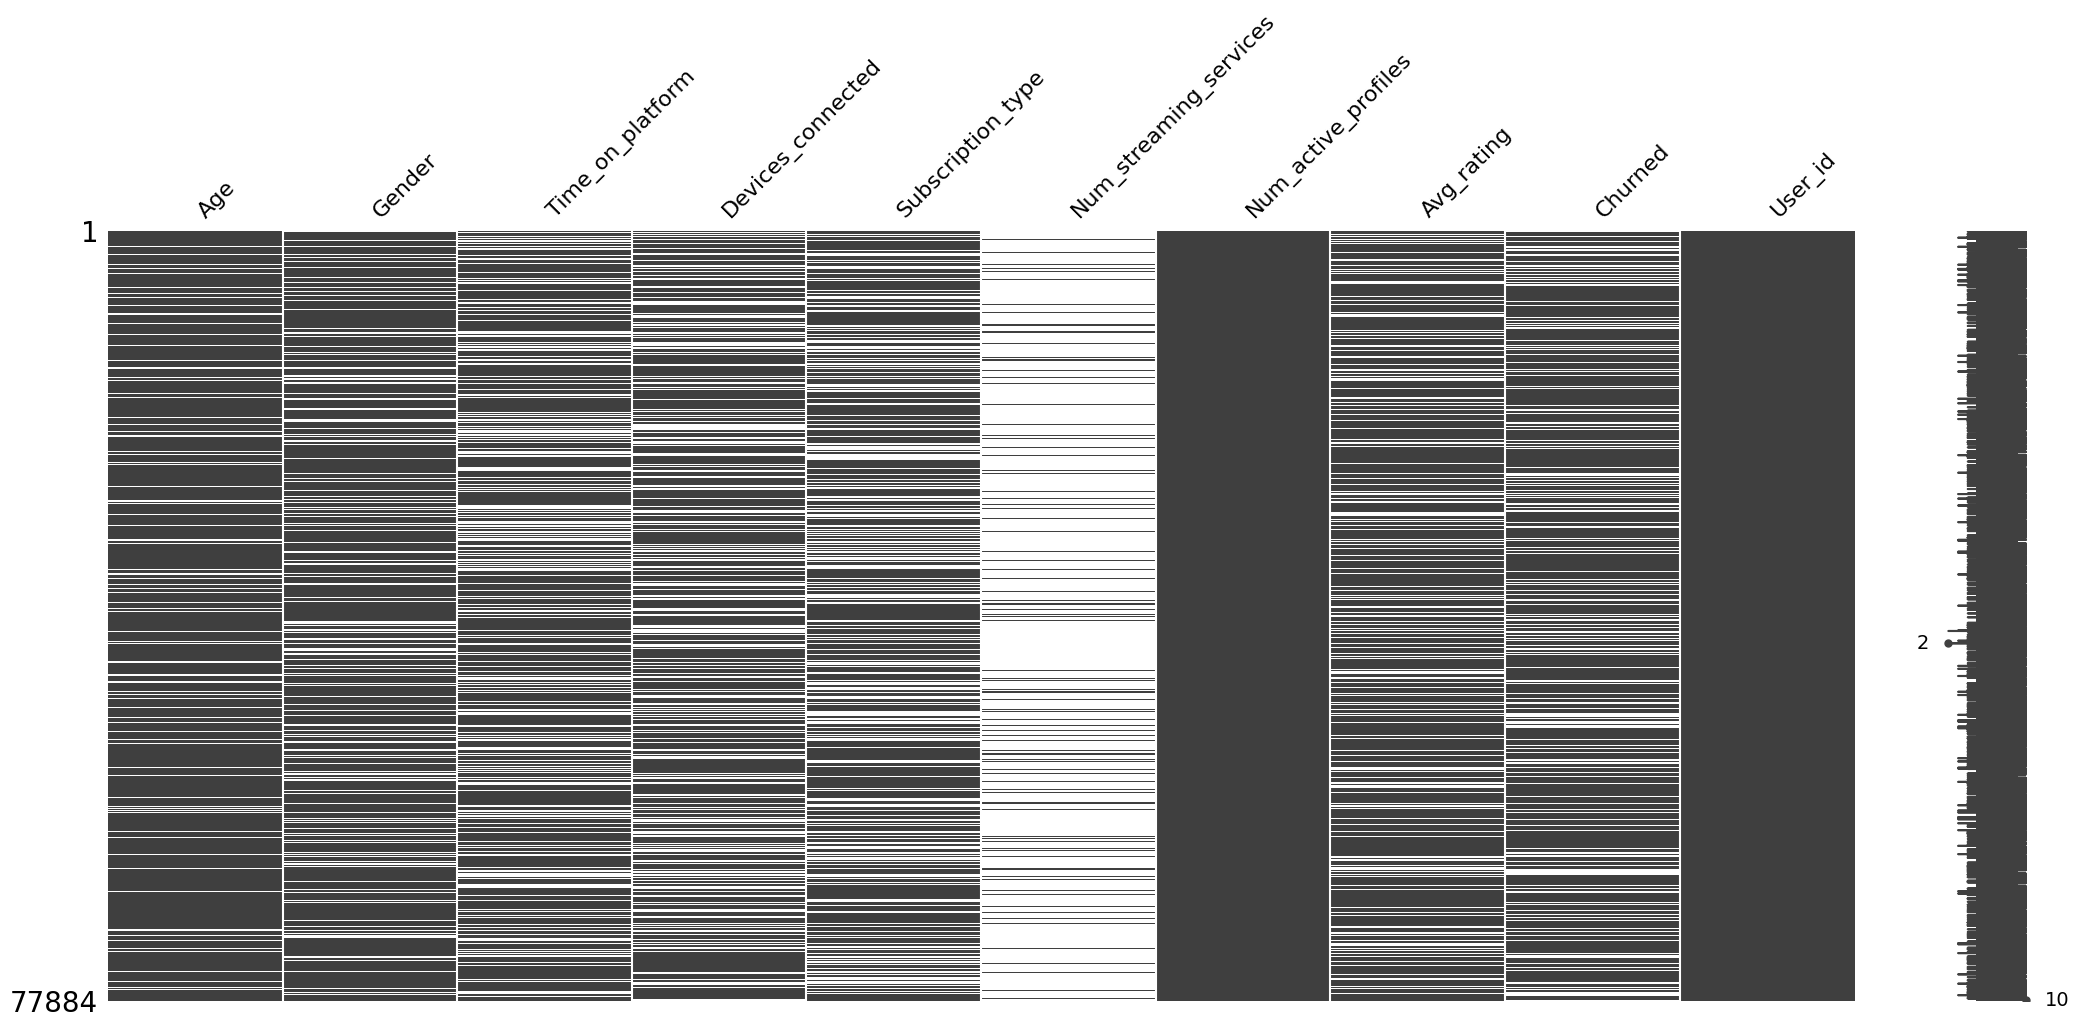

In [ ]:
# Gráfico com valores faltantes
msno.matrix(churn);

In [ ]:
# Identificando linhas em branco
churn[churn.isna().any(axis=1)]

Age  Gender  Time_on_platform  Devices_connected Subscription_type  \
0      49.0    Male            4700.0                3.0             Basic   
1      69.0  Female            6107.0                2.0          Standard   
3      26.0    Male               NaN                5.0             Basic   
4      18.0     NaN            1948.0                3.0             Basic   
5      54.0    Male            3024.0                2.0             Basic   
...     ...     ...               ...                ...               ...   
77879  45.0    Male               NaN                NaN             Basic   
77880  47.0  Female            6176.0                NaN           Premium   
77881  64.0  Female               NaN                5.0           Premium   
77882  58.0    Male            1314.0                5.0          Standard   
77883  68.0  Female            7078.0                1.0          Standard   

       Num_streaming_services  Num_active_profiles  Avg_rating  Churned  \
0                         NaN                    3         NaN      0.0   
1                         NaN                    1        2.14      0.0   
3                         NaN                    2         NaN      NaN   
4                         NaN                    3        3.88      0.0   
5                         NaN                    1         NaN      0.0   
...                       ...                  ...         ...      ...   
77879                     NaN                    5        2.20      0.0   
77880                     NaN                    2        4.54      0.0   
77881                     NaN                    1        4.34      1.0   
77882                     NaN                    4         NaN      0.0   
77883                     NaN                    5        1.68      0.0   

                                    User_id  
0      a271aa56-bcfc-4f0a-91f7-b773de6b86a4  
1      fe14b048-770b-4619-8ec6-485b0969ae31  
3      c316f2f5-3403-4a0a-82c2-c98e4b3379d2  
4      14879bcb-1977-4ad8-a7f9-6aa9bf7b872f  
5      a1df3a13-9255-4d00-8a9d-20565fefaab9  
...                                     ...  
77879  6b51fe0d-d4a1-41ed-a55c-d05f5c961e3c  
77880  59d70167-6be0-474c-b71e-14153205b44f  
77881  a7d5ed26-78a4-4e70-bd04-0fec883e56aa  
77882  472e9e70-87ca-4c5e-bfee-fa9f42b54f51  
77883  f8450244-52b1-4303-9275-00a1d4fbc331  

[76453 rows x 10 columns]

In [ ]:
ProfileReport(churn)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

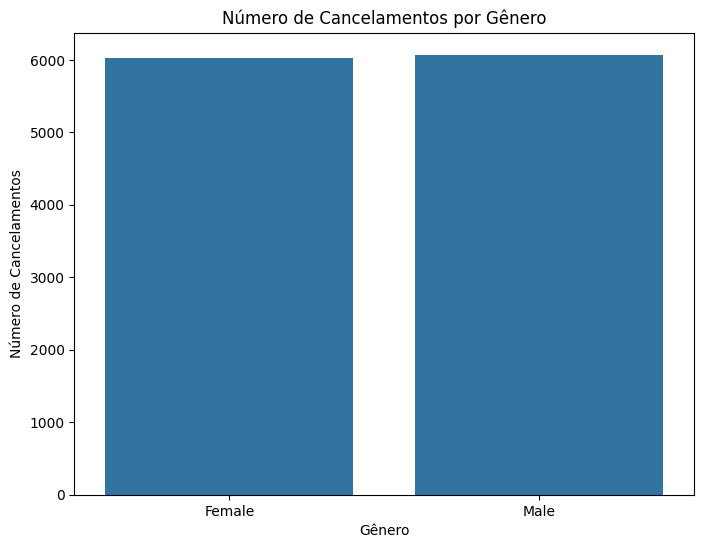

In [ ]:
# Cancelamentos por gênero

cancelamentos_genero = churn.groupby('Gender')['Churned'].sum()

plt.figure(figsize=(8, 6))
sns.barplot(x=cancelamentos_genero.index, y=cancelamentos_genero.values)
plt.title('Número de Cancelamentos por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Número de Cancelamentos')
plt.show();

<ipython-input-550-76faa1f6ac7c>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cancelamentos_idade = churn.groupby('AgeGroup')['Churned'].sum()


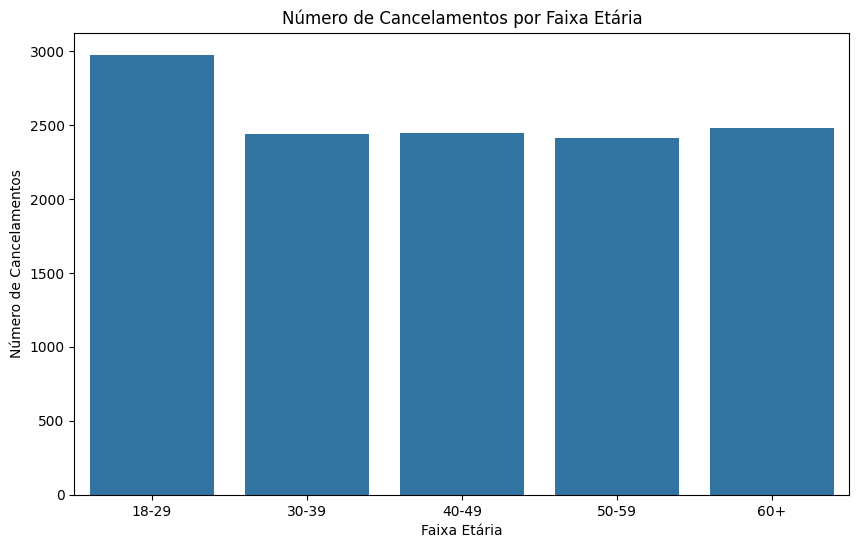

In [ ]:
# Cancelamentos por faixa etária

bins = [18, 30, 40, 50, 60, float('inf')]
labels = ['18-29', '30-39', '40-49', '50-59', '60+']
churn['AgeGroup'] = pd.cut(churn['Age'], bins=bins, labels=labels, right=False)

cancelamentos_idade = churn.groupby('AgeGroup')['Churned'].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=cancelamentos_idade.index, y=cancelamentos_idade.values)
plt.title('Número de Cancelamentos por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Cancelamentos')
plt.show();

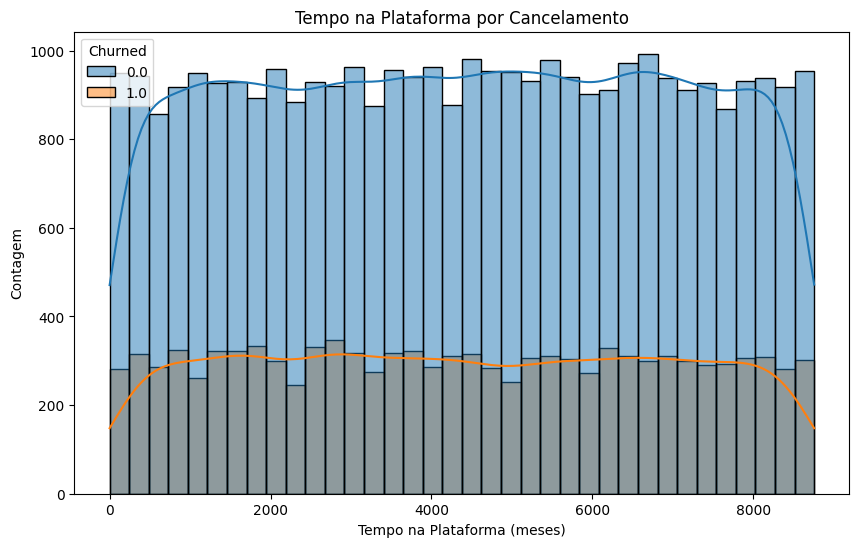

In [ ]:
# Cancelamento por tempo na plataforma

plt.figure(figsize=(10, 6))
sns.histplot(data=churn, x='Time_on_platform', hue='Churned', kde=True)
plt.title('Tempo na Plataforma por Cancelamento')
plt.xlabel('Tempo na Plataforma (meses)')
plt.ylabel('Contagem')
plt.show()

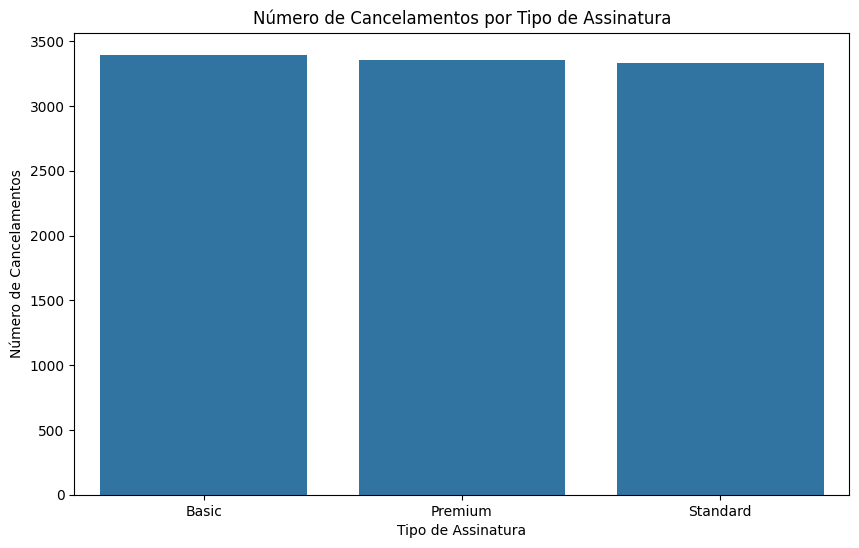

In [ ]:
# Cancelamentos por tipo de assinatura

cancelamentos_assinatura = churn.groupby('Subscription_type')['Churned'].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=cancelamentos_assinatura.index, y=cancelamentos_assinatura.values)
plt.title('Número de Cancelamentos por Tipo de Assinatura')
plt.xlabel('Tipo de Assinatura')
plt.ylabel('Número de Cancelamentos')
plt.show()

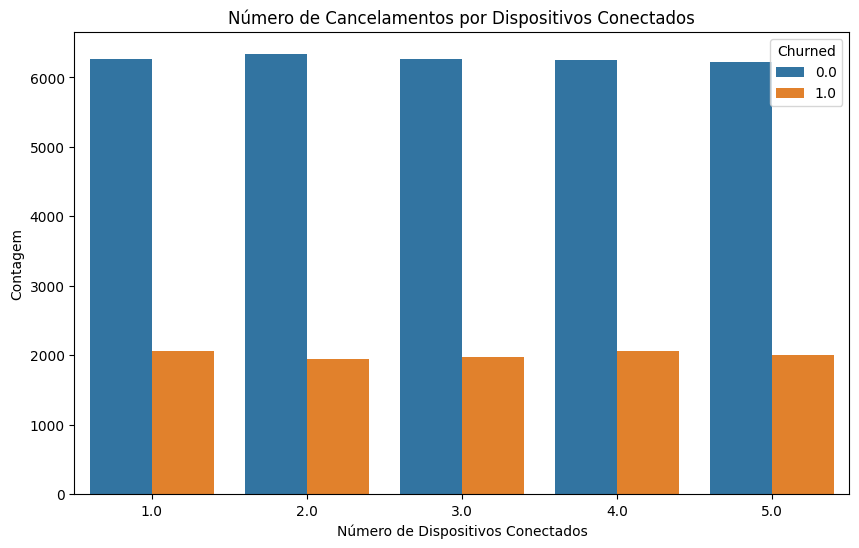

In [ ]:
# Cancelamentos por número de dispositivos conectados

plt.figure(figsize=(10, 6))
sns.countplot(data=churn, x='Devices_connected', hue='Churned')
plt.title('Número de Cancelamentos por Dispositivos Conectados')
plt.xlabel('Número de Dispositivos Conectados')
plt.ylabel('Contagem')
plt.show()

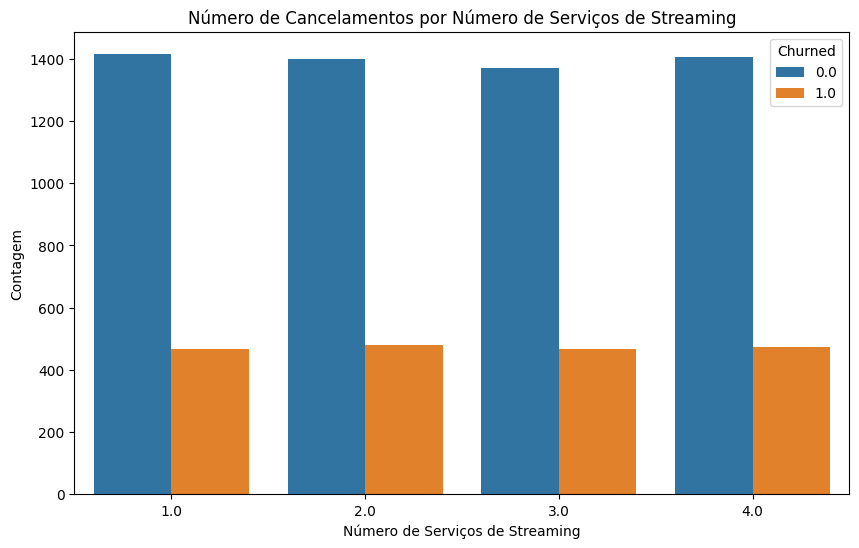

In [ ]:
# Cancelamentos por número de serviços de streaming por usuário

plt.figure(figsize=(10, 6))
sns.countplot(data=churn, x='Num_streaming_services', hue='Churned')
plt.title('Número de Cancelamentos por Número de Serviços de Streaming')
plt.xlabel('Número de Serviços de Streaming')
plt.ylabel('Contagem')
plt.show()

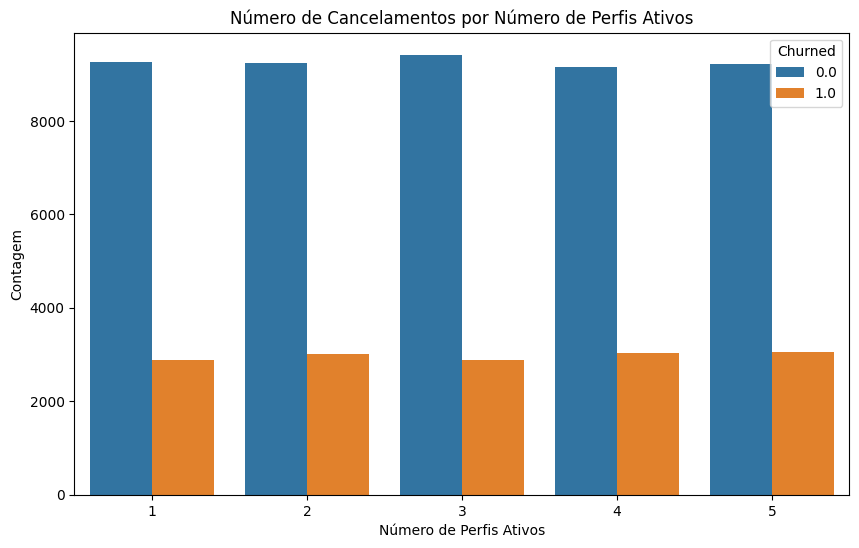

In [ ]:
# Cancelamentos por número de perfis ativos

plt.figure(figsize=(10, 6))
sns.countplot(data=churn, x='Num_active_profiles', hue='Churned')
plt.title('Número de Cancelamentos por Número de Perfis Ativos')
plt.xlabel('Número de Perfis Ativos')
plt.ylabel('Contagem')
plt.show()

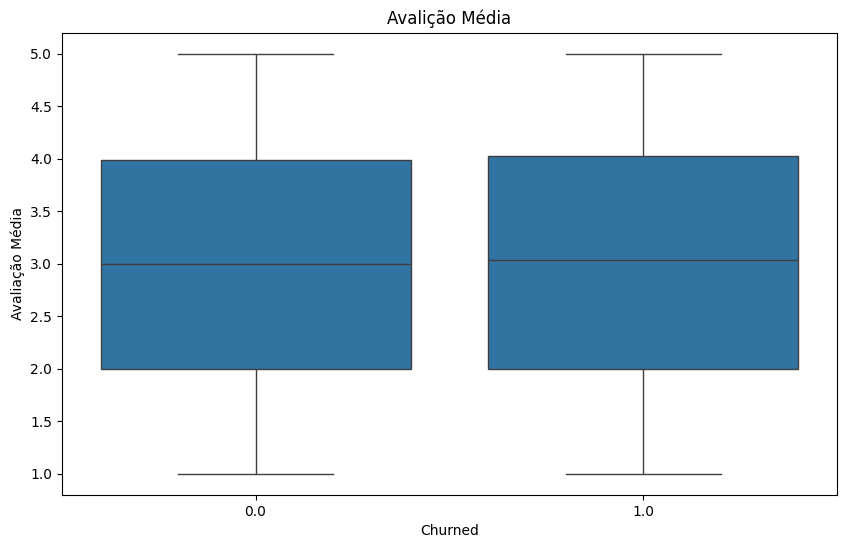

In [ ]:
# Cancelamentos por avalição média

plt.figure(figsize=(10, 6))
sns.boxplot(data=churn, x='Churned', y='Avg_rating')
plt.title('Avalição Média')
plt.xlabel('Churned')
plt.ylabel('Avaliação Média')
plt.show()

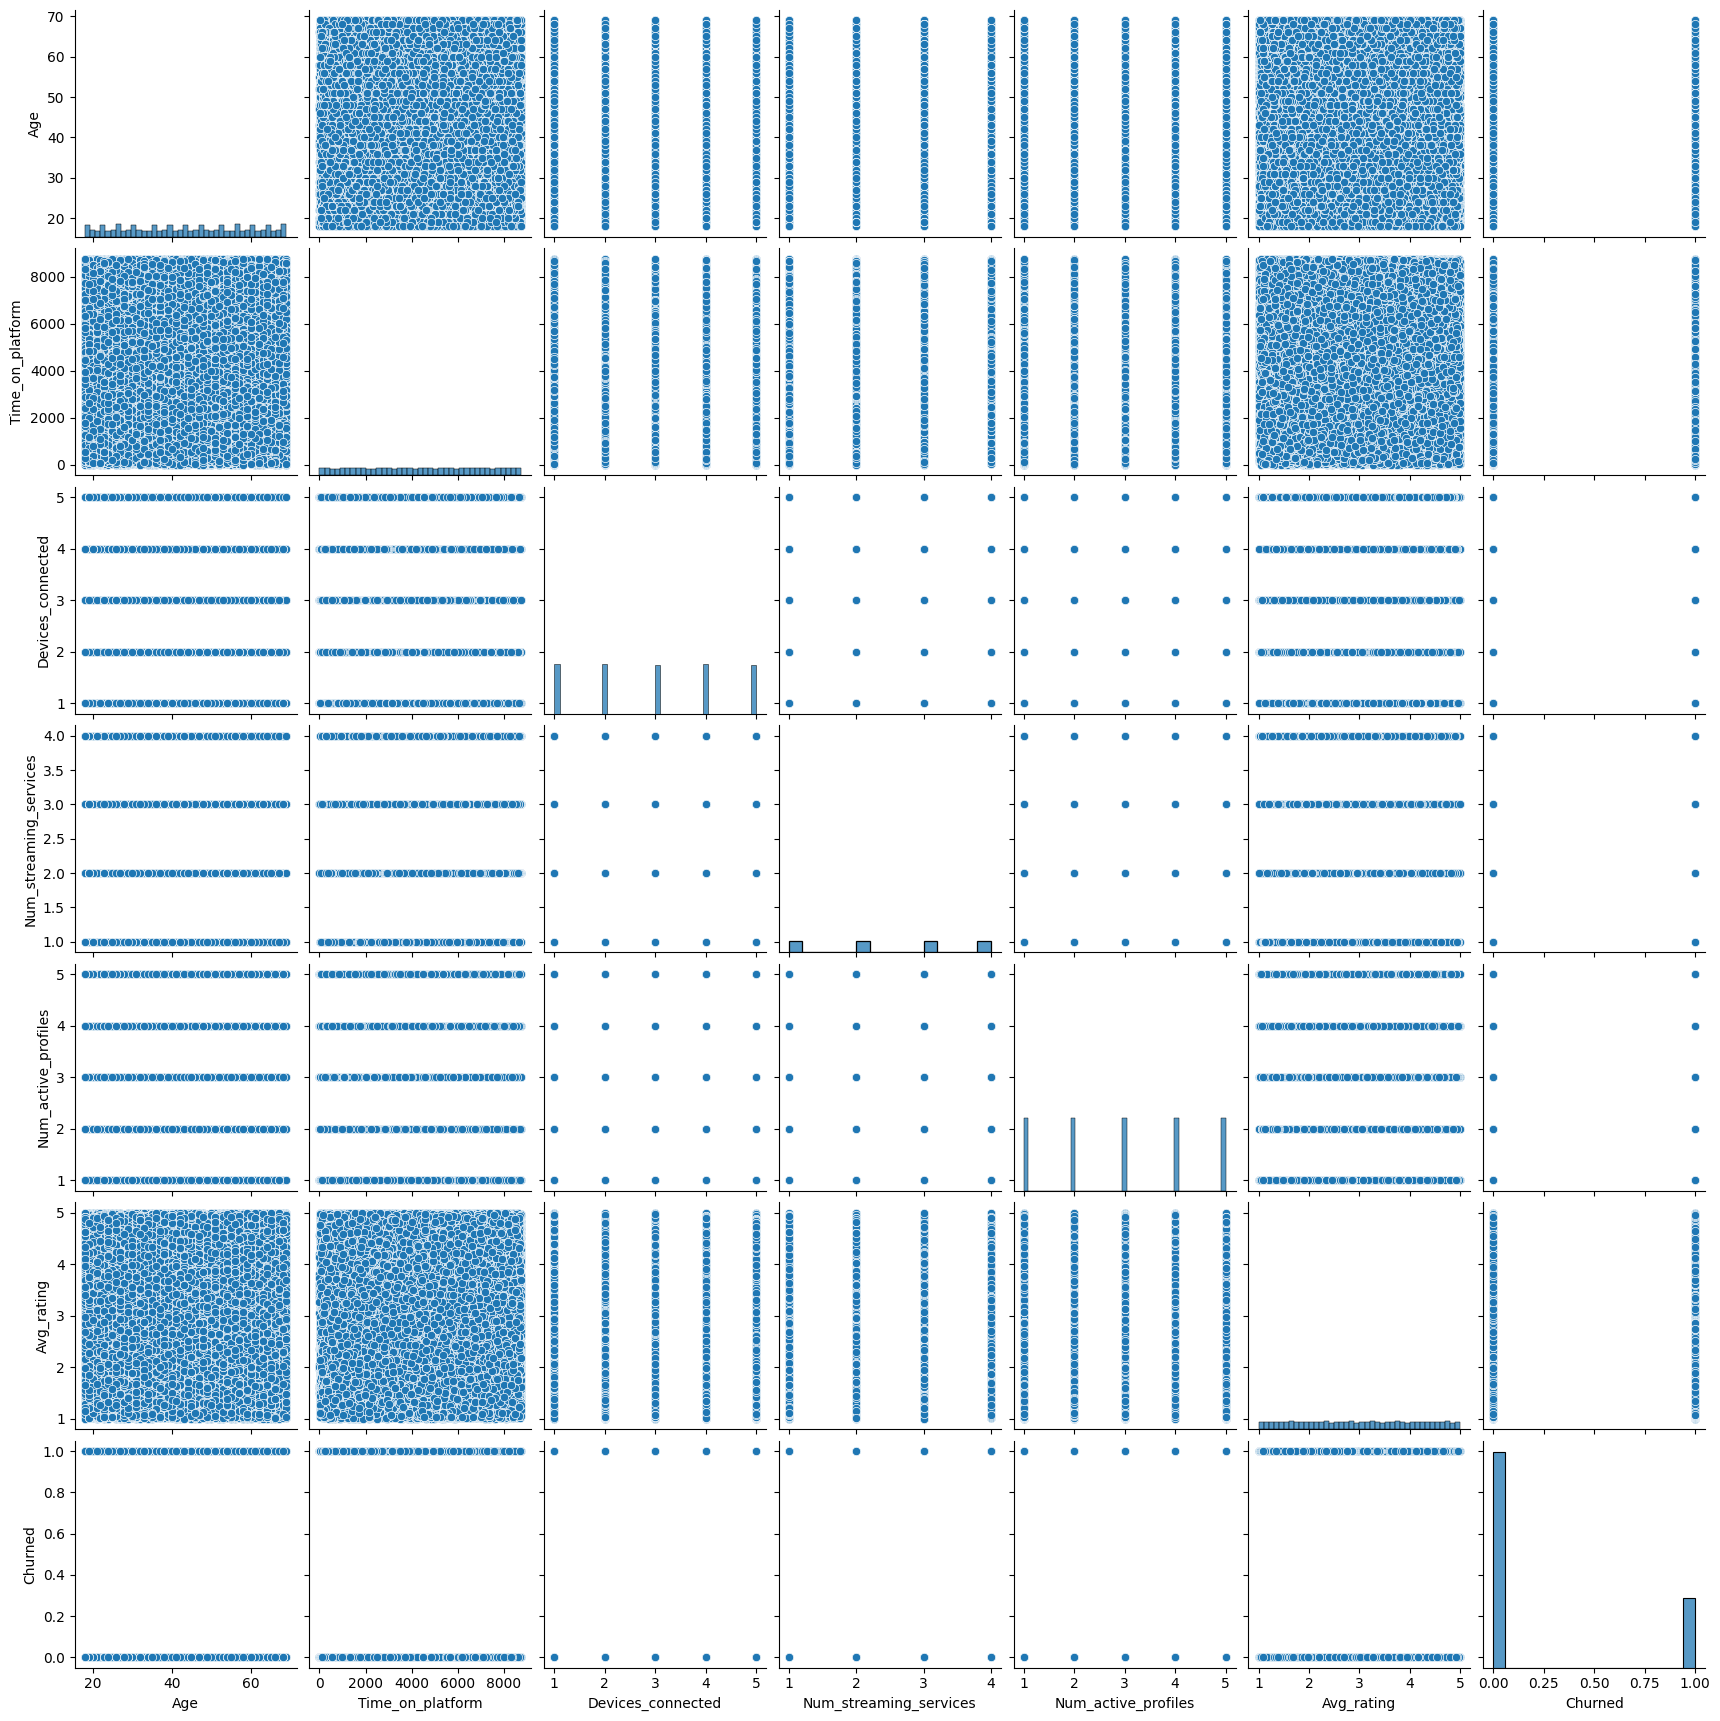

In [ ]:
sns.pairplot(churn);

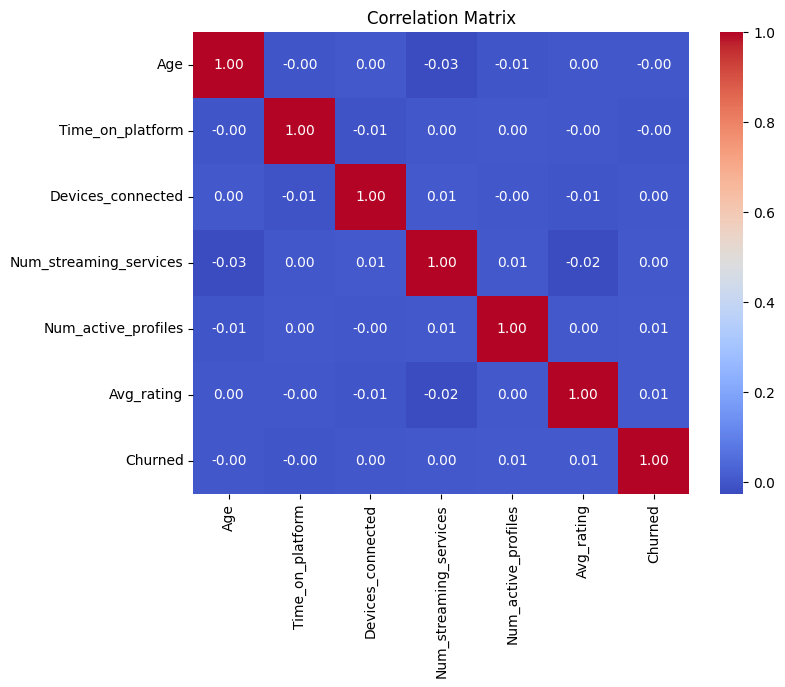

In [ ]:
# Gráfico de correlações

plt.figure(figsize=(8, 6))

numerical_churn = churn.select_dtypes(include=np.number)
correlation_matrix = numerical_churn.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Análise Exploratória

In [ ]:
# Substituir valores “NaN”

churn['Time_on_platform'] = churn['Time_on_platform'].fillna(0)
churn['Num_streaming_services'] = churn['Num_streaming_services'].fillna(0)
churn['Churned'] = churn['Churned'].fillna(0)
churn['Avg_rating'] = churn['Avg_rating'].fillna(0)
churn['Devices_connected'] = churn['Devices_connected'].fillna(0)

In [ ]:
# Excluindo linhas nulas

churn = churn.dropna(subset=['Gender', 'Subscription_type', 'Age'])

In [ ]:
# Transformando valores churned 0 e 1 por No e Yes

churn['Churned'] = churn['Churned'].replace({0: 'No', 1: 'Yes'})

<ipython-input-561-9c0013d37a26>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn['Churned'] = churn['Churned'].replace({0: 'No', 1: 'Yes'})


In [ ]:
# Convertendo colunas numéricas para inteiros

for column in ['Age', 'Time_on_platform','Devices_connected', 'Num_streaming_services', 'Num_active_profiles', 'Avg_rating']:
    churn[column] = churn[column].astype(int)

<ipython-input-562-b2f4fd60d8b8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn[column] = churn[column].astype(int)
<ipython-input-562-b2f4fd60d8b8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn[column] = churn[column].astype(int)
<ipython-input-562-b2f4fd60d8b8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

In [ ]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36515 entries, 0 to 77883
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Age                     36515 non-null  int64   
 1   Gender                  36515 non-null  object  
 2   Time_on_platform        36515 non-null  int64   
 3   Devices_connected       36515 non-null  int64   
 4   Subscription_type       36515 non-null  object  
 5   Num_streaming_services  36515 non-null  int64   
 6   Num_active_profiles     36515 non-null  int64   
 7   Avg_rating              36515 non-null  int64   
 8   Churned                 36515 non-null  object  
 9   User_id                 36515 non-null  object  
 10  AgeGroup                36515 non-null  category
dtypes: category(1), int64(6), object(4)
memory usage: 3.1+ MB


# Modelagem

## Regressão Logística

In [ ]:
churn.head(1)

Age Gender  Time_on_platform  Devices_connected Subscription_type  \
0   49   Male              4700                  3             Basic   

   Num_streaming_services  Num_active_profiles  Avg_rating Churned  \
0                       0                    3           0      No   

                                User_id AgeGroup  
0  a271aa56-bcfc-4f0a-91f7-b773de6b86a4    40-49

In [ ]:
churn = churn.drop(['AgeGroup'], axis=1)

In [ ]:
churn = churn.drop(['User_id'], axis=1)

In [ ]:
X = churn.drop(['Churned'], axis=1)
y = churn['Churned']

In [ ]:
churn.head(1)

Age Gender  Time_on_platform  Devices_connected Subscription_type  \
0   49   Male              4700                  3             Basic   

   Num_streaming_services  Num_active_profiles  Avg_rating Churned  
0                       0                    3           0      No

In [ ]:
le = LabelEncoder()

In [ ]:
le.fit(y)
y = le.transform(y)

In [ ]:
X = pd.get_dummies(X)

In [ ]:
mm = MinMaxScaler()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [ ]:
model = LogisticRegression()

In [ ]:
lr = model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
lr.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
X_test.assign(Churned = y_test).assign (label = lr.predict(X_test))

Age  Time_on_platform  Devices_connected  Num_streaming_services  \
29399   49              6090                  1                       0   
65693   32                 0                  1                       0   
3069    56              8671                  0                       0   
75890   60              8437                  4                       2   
22770   32              8129                  5                       0   
...    ...               ...                ...                     ...   
40947   23                 0                  0                       0   
77550   42              2166                  4                       0   
77635   48              4440                  5                       3   
39003   62              5918                  5                       0   
5159    22              3004                  0                       0   

       Num_active_profiles  Avg_rating  Gender_Female  Gender_Male  \
29399                    3           0           True        False   
65693                    4           0           True        False   
3069                     5           1           True        False   
75890                    4           1          False         True   
22770                    5           4          False         True   
...                    ...         ...            ...          ...   
40947                    4           3           True        False   
77550                    5           1          False         True   
77635                    4           3          False         True   
39003                    5           2           True        False   
5159                     2           4           True        False   

       Subscription_type_Basic  Subscription_type_Premium  \
29399                    False                       True   
65693                    False                      False   
3069                     False                       True   
75890                    False                      False   
22770                    False                       True   
...                        ...                        ...   
40947                     True                      False   
77550                    False                      False   
77635                    False                       True   
39003                     True                      False   
5159                     False                       True   

       Subscription_type_Standard  Churned  label  
29399                       False        1      0  
65693                        True        0      0  
3069                        False        0      0  
75890                        True        0      0  
22770                       False        0      0  
...                           ...      ...    ...  
40947                       False        0      0  
77550                        True        1      0  
77635                       False        0      0  
39003                       False        0      0  
5159                        False        1      0  

[9129 rows x 13 columns]

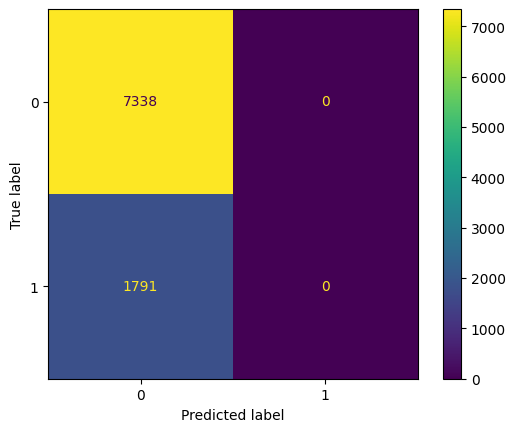

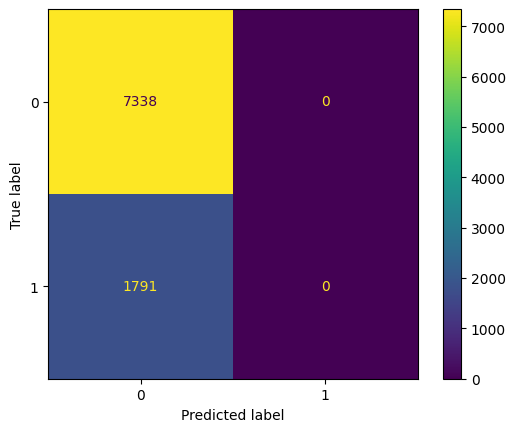

In [ ]:
cm_display = ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test, values_format='d')

cm_display.plot()

## Tunning Logistic Regression

In [ ]:
metricas_lr = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

In [ ]:
grid_search = GridSearchCV(model, metricas_lr, scoring='roc_auc', cv=5, n_jobs=-1)

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='roc_auc')

In [ ]:
results = pd.DataFrame(grid_search.cv_results_)

In [ ]:
grid_search.best_estimator_.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# Criando um dicionário

lr_tunned = LogisticRegression(
    C=0.1,
    class_weight=None,
    dual=False,
    fit_intercept=True,
    intercept_scaling=1,
    l1_ratio=None,
    max_iter=100,
    multi_class='deprecated',
    n_jobs=None,
    penalty='l1',
    random_state=None,
    solver='saga',
    tol=0.0001,
    verbose=0,
    warm_start=False
)

lr_tunned

LogisticRegression(C=0.1, penalty='l1', solver='saga')

In [ ]:
lr_tunned.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=0.1, penalty='l1', solver='saga')

In [ ]:
lr_tunned.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
X_test.assign(Churned = y_test, label = lr_tunned.predict(X_test))

Age  Time_on_platform  Devices_connected  Num_streaming_services  \
29399   49              6090                  1                       0   
65693   32                 0                  1                       0   
3069    56              8671                  0                       0   
75890   60              8437                  4                       2   
22770   32              8129                  5                       0   
...    ...               ...                ...                     ...   
40947   23                 0                  0                       0   
77550   42              2166                  4                       0   
77635   48              4440                  5                       3   
39003   62              5918                  5                       0   
5159    22              3004                  0                       0   

       Num_active_profiles  Avg_rating  Gender_Female  Gender_Male  \
29399                    3           0           True        False   
65693                    4           0           True        False   
3069                     5           1           True        False   
75890                    4           1          False         True   
22770                    5           4          False         True   
...                    ...         ...            ...          ...   
40947                    4           3           True        False   
77550                    5           1          False         True   
77635                    4           3          False         True   
39003                    5           2           True        False   
5159                     2           4           True        False   

       Subscription_type_Basic  Subscription_type_Premium  \
29399                    False                       True   
65693                    False                      False   
3069                     False                       True   
75890                    False                      False   
22770                    False                       True   
...                        ...                        ...   
40947                     True                      False   
77550                    False                      False   
77635                    False                       True   
39003                     True                      False   
5159                     False                       True   

       Subscription_type_Standard  Churned  label  
29399                       False        1      0  
65693                        True        0      0  
3069                        False        0      0  
75890                        True        0      0  
22770                       False        0      0  
...                           ...      ...    ...  
40947                       False        0      0  
77550                        True        1      0  
77635                       False        0      0  
39003                       False        0      0  
5159                        False        1      0  

[9129 rows x 13 columns]

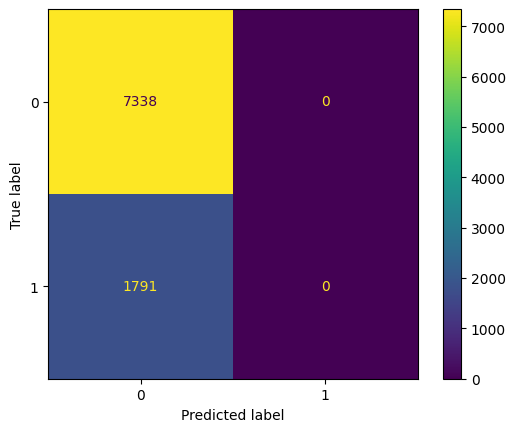

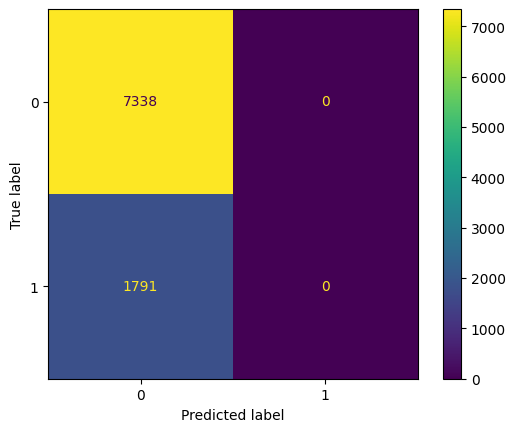

In [ ]:
cm_display = ConfusionMatrixDisplay.from_estimator(lr_tunned, X_test, y_test, values_format='d')

cm_display.plot()

In [ ]:
print(f'Acurácia Treino: {accuracy_score(y_train, lr.predict(X_train))}')
print(f'Acurácia Teste: {accuracy_score(y_test, lr.predict(X_test))}')
print(" ")

print(f'Acurácia balanceada Treino: {balanced_accuracy_score(y_train, lr.predict(X_train))}')
print(f'Acurácia balanceada Teste: {balanced_accuracy_score(y_test, lr.predict(X_test))}')
print(" ")

print(f'Precisão Treino: {precision_score(y_train, lr.predict(X_train))}')
print(f'Precisão Teste: {precision_score(y_test, lr.predict(X_test))}')
print(" ")

print(f'Recall Treino: {recall_score(y_train, lr.predict(X_train))}')
print(f'Recall Teste: {recall_score(y_test, lr.predict(X_test))}')
print(" ")

print(f'F1 Treino: {f1_score(y_train, lr.predict(X_train))}')
print(f'F1 Teste: {f1_score(y_test, lr.predict(X_test))}')
print(" ")

print(f'ROC Treino: {roc_auc_score(y_train, lr.predict_proba(X_train)[:,1])}')
print(f'ROC Teste: {roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])}')
print(" ")

Acurácia Treino: 0.8077484846271817
Acurácia Teste: 0.8038120276043378
 
Acurácia balanceada Treino: 0.5
Acurácia balanceada Teste: 0.5
 
Precisão Treino: 0.0
Precisão Teste: 0.0
 
Recall Treino: 0.0
Recall Teste: 0.0
 
F1 Treino: 0.0
F1 Teste: 0.0
 
ROC Treino: 0.5117585602419019
ROC Teste: 0.5005926257677656
 


## Random Forest

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
rf.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
X_test.assign(Churn = y_test).assign(label = rf.predict(X_test))

Age  Time_on_platform  Devices_connected  Num_streaming_services  \
29399   49              6090                  1                       0   
65693   32                 0                  1                       0   
3069    56              8671                  0                       0   
75890   60              8437                  4                       2   
22770   32              8129                  5                       0   
...    ...               ...                ...                     ...   
40947   23                 0                  0                       0   
77550   42              2166                  4                       0   
77635   48              4440                  5                       3   
39003   62              5918                  5                       0   
5159    22              3004                  0                       0   

       Num_active_profiles  Avg_rating  Gender_Female  Gender_Male  \
29399                    3           0           True        False   
65693                    4           0           True        False   
3069                     5           1           True        False   
75890                    4           1          False         True   
22770                    5           4          False         True   
...                    ...         ...            ...          ...   
40947                    4           3           True        False   
77550                    5           1          False         True   
77635                    4           3          False         True   
39003                    5           2           True        False   
5159                     2           4           True        False   

       Subscription_type_Basic  Subscription_type_Premium  \
29399                    False                       True   
65693                    False                      False   
3069                     False                       True   
75890                    False                      False   
22770                    False                       True   
...                        ...                        ...   
40947                     True                      False   
77550                    False                      False   
77635                    False                       True   
39003                     True                      False   
5159                     False                       True   

       Subscription_type_Standard  Churn  label  
29399                       False      1      0  
65693                        True      0      0  
3069                        False      0      0  
75890                        True      0      0  
22770                       False      0      1  
...                           ...    ...    ...  
40947                       False      0      0  
77550                        True      1      1  
77635                       False      0      0  
39003                       False      0      0  
5159                        False      1      0  

[9129 rows x 13 columns]

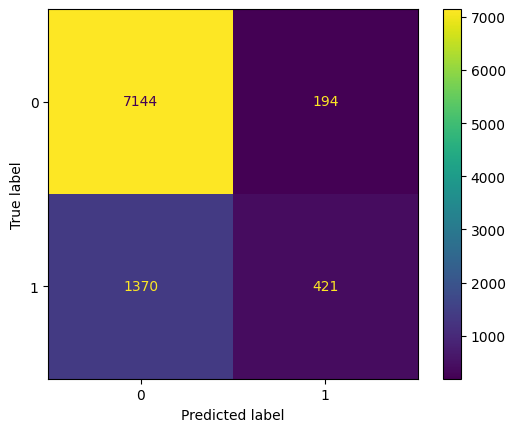

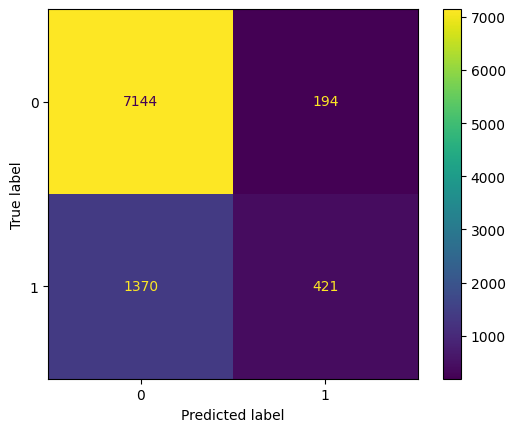

In [ ]:
cm_display = ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, values_format='d')

cm_display.plot()

In [ ]:
print(f'Acurácia Treino: {accuracy_score(y_train, rf.predict(X_train))}')
print(f'Acurácia Teste: {accuracy_score(y_test, rf.predict(X_test))}')
print(" ")

print(f'Acurácia balanceada Treino: {balanced_accuracy_score(y_train, rf.predict(X_train))}')
print(f'Acurácia balanceada Teste: {balanced_accuracy_score(y_test, rf.predict(X_test))}')
print(" ")

print(f'Precisão Treino: {precision_score(y_train, rf.predict(X_train))}')
print(f'Precisão Teste: {precision_score(y_test, rf.predict(X_test))}')
print(" ")

print(f'Recall Treino: {recall_score(y_train, rf.predict(X_train))}')
print(f'Recall Teste: {recall_score(y_test, rf.predict(X_test))}')
print(" ")

print(f'F1 Treino: {f1_score(y_train, rf.predict(X_train))}')
print(f'F1 Teste: {f1_score(y_test, rf.predict(X_test))}')
print(" ")

print(f'ROC Treino: {roc_auc_score(y_train, rf.predict_proba(X_train)[:,1])}')
print(f'ROC Teste: {roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])}')
print(" ")

Acurácia Treino: 0.9946322938727817
Acurácia Teste: 0.8286778398510242
 
Acurácia balanceada Treino: 0.9885002554155546
Acurácia balanceada Teste: 0.6043132442442978
 
Precisão Treino: 0.9934438873891246
Precisão Teste: 0.6845528455284553
 
Recall Treino: 0.9785375118708453
Recall Teste: 0.2350642099385818
 
F1 Treino: 0.9859343603482921
F1 Teste: 0.34995843724023273
 
ROC Treino: 0.99971489364826
ROC Teste: 0.66244466936603
 


## Tunning Random Forest Classifier

In [ ]:
parametros = {
    'max_depth':[1,2,3,4,5,6,7,8,9,10],
    'n_estimators': [100, 300, 500]
}

grid_search = GridSearchCV(rf, parametros, scoring='accuracy', cv=5, n_jobs=-1)

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [100, 300, 500]},
             scoring='accuracy')

In [ ]:
grid_search.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
rf_tunned = RandomForestClassifier(
    bootstrap=True,
    ccp_alpha=0.0,
    class_weight=None,
    criterion='gini',
    max_depth=10,
    max_features='sqrt',
    max_leaf_nodes=None,
    max_samples=None,
    min_impurity_decrease=0.0,
    min_samples_leaf=1,
    min_samples_split=2,
    min_weight_fraction_leaf=0.0,
    monotonic_cst=None,
    n_estimators=100,
    n_jobs=None,
    oob_score=False,
    random_state=None,
    verbose=0,
    warm_start=False
)

In [ ]:
rf_tunned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [ ]:
rf_tunned.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
X_test.assign(Churned = y_test).assign(label = rf_tunned.predict(X_test))

Age  Time_on_platform  Devices_connected  Num_streaming_services  \
29399   49              6090                  1                       0   
65693   32                 0                  1                       0   
3069    56              8671                  0                       0   
75890   60              8437                  4                       2   
22770   32              8129                  5                       0   
...    ...               ...                ...                     ...   
40947   23                 0                  0                       0   
77550   42              2166                  4                       0   
77635   48              4440                  5                       3   
39003   62              5918                  5                       0   
5159    22              3004                  0                       0   

       Num_active_profiles  Avg_rating  Gender_Female  Gender_Male  \
29399                    3           0           True        False   
65693                    4           0           True        False   
3069                     5           1           True        False   
75890                    4           1          False         True   
22770                    5           4          False         True   
...                    ...         ...            ...          ...   
40947                    4           3           True        False   
77550                    5           1          False         True   
77635                    4           3          False         True   
39003                    5           2           True        False   
5159                     2           4           True        False   

       Subscription_type_Basic  Subscription_type_Premium  \
29399                    False                       True   
65693                    False                      False   
3069                     False                       True   
75890                    False                      False   
22770                    False                       True   
...                        ...                        ...   
40947                     True                      False   
77550                    False                      False   
77635                    False                       True   
39003                     True                      False   
5159                     False                       True   

       Subscription_type_Standard  Churned  label  
29399                       False        1      0  
65693                        True        0      0  
3069                        False        0      0  
75890                        True        0      0  
22770                       False        0      0  
...                           ...      ...    ...  
40947                       False        0      0  
77550                        True        1      0  
77635                       False        0      0  
39003                       False        0      0  
5159                        False        1      0  

[9129 rows x 13 columns]

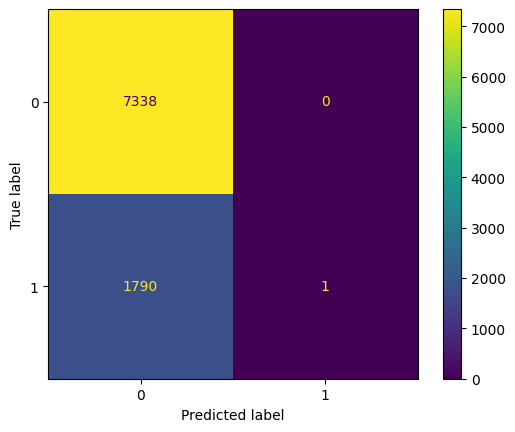

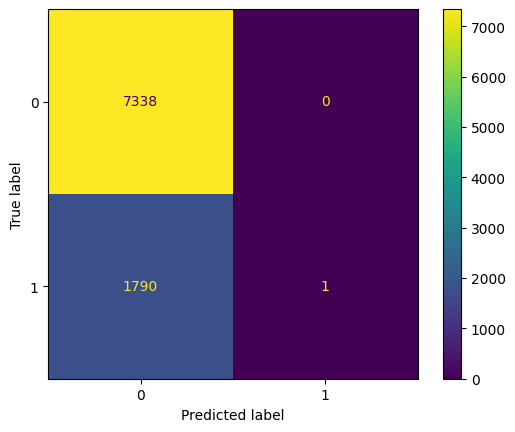

In [ ]:
cm_display = ConfusionMatrixDisplay.from_estimator(rf_tunned, X_test, y_test, values_format='d')

cm_display.plot()

In [ ]:
print(f'Acurácia Treino: {accuracy_score(y_train, rf_tunned.predict(X_train))}')
print(f'Acurácia Teste: {accuracy_score(y_test, rf_tunned.predict(X_test))}')
print(" ")

print(f'Acurácia balanceada Treino: {balanced_accuracy_score(y_train, rf_tunned.predict(X_train))}')
print(f'Acurácia balanceada Teste: {balanced_accuracy_score(y_test, rf_tunned.predict(X_test))}')
print(" ")

print(f'Precisão Treino: {precision_score(y_train, rf_tunned.predict(X_train))}')
print(f'Precisão Teste: {precision_score(y_test, rf_tunned.predict(X_test))}')
print(" ")

print(f'Recall Treino: {recall_score(y_train, rf_tunned.predict(X_train))}')
print(f'Recall Teste: {recall_score(y_test, rf_tunned.predict(X_test))}')
print(" ")

print(f'F1 Treino: {f1_score(y_train, rf_tunned.predict(X_train))}')
print(f'F1 Teste: {f1_score(y_test, rf_tunned.predict(X_test))}')
print(" ")

print(f'ROC Treino: {roc_auc_score(y_train, rf_tunned.predict_proba(X_train)[:,1])}')
print(f'ROC Teste: {roc_auc_score(y_test, rf_tunned.predict_proba(X_test)[:,1])}')
print(" ")

Acurácia Treino: 0.8090265098955671
Acurácia Teste: 0.803921568627451
 
Acurácia balanceada Treino: 0.50332383665717
Acurácia balanceada Teste: 0.5002791736460078
 
Precisão Treino: 1.0
Precisão Teste: 1.0
 
Recall Treino: 0.006647673314339981
Recall Teste: 0.0005583472920156337
 
F1 Treino: 0.013207547169811321
F1 Teste: 0.0011160714285714285
 
ROC Treino: 0.8811047998848429
ROC Teste: 0.5611193212055249
 
